In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

In [2]:
# 生成样本集
def generate(sample_size, mean, cov, diff, regression):
    num_classes = 2
    samples_per_class = int(sample_size/2)
    
    x0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        x1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        y1 = (ci+1) * np.ones(samples_per_class)
        
        x0 = np.concatenate((x0, x1))
        y0 = np.concatenate((y0, y1))
    
    if regression == False:
        class_ind = [y0 == class_number for class_number in range(num_classes)]
        y = np.asanyarray(np.hstack(class_ind), dtype=np.float32)
    
    x, y = shuffle(x0, y0)
    
    return x, y

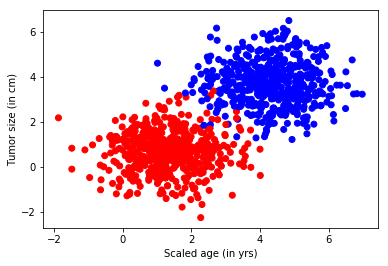

In [3]:
np.random.seed(10)
num_classes = 2
mean = np.random.randn(num_classes)
cov = np.eye(num_classes)
x, y = generate(1000, mean, cov, [3.0], True)
colors = ['r' if l == 0 else 'b' for l in y[:]]
plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.xlabel('Scaled age (in yrs)')
plt.ylabel('Tumor size (in cm)')
plt.show()


In [4]:
# 构建网络结构
lab_dim = 1
input_dim = 2 
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_labels = tf.placeholder(tf.float32, [None, lab_dim])


w = tf.Variable(tf.random_normal([input_dim, lab_dim]), name='weight')
b = tf.Variable(tf.zeros([lab_dim,]), name='bias')

output = tf.nn.sigmoid(tf.matmul(input_features, w)+b)
cross_entropy = -(input_labels * tf.log(output)+(1-input_labels)* tf.log(1-output))
ser = tf.square(input_labels - output)
loss = tf.reduce_mean(cross_entropy)
err = tf.reduce_mean(ser)
optimizer =  tf.train.AdamOptimizer(0.04)
train = optimizer.minimize(loss)

Epoch: 0001 cost= 0.412804574 err= 0.31170124411582945
Epoch: 0002 cost= 0.285131514 err= 0.13040862809866666
Epoch: 0003 cost= 0.208051264 err= 0.07749681826680899
Epoch: 0004 cost= 0.162575722 err= 0.05263293334282935
Epoch: 0005 cost= 0.134494483 err= 0.039848112128674985
Epoch: 0006 cost= 0.115389176 err= 0.032418476254679265
Epoch: 0007 cost= 0.101577967 err= 0.02769363534171134
Epoch: 0008 cost= 0.091145828 err= 0.024482739518862217
Epoch: 0009 cost= 0.082987100 err= 0.022186315176077186
Epoch: 0010 cost= 0.076427117 err= 0.0204771650955081
Epoch: 0011 cost= 0.071032524 err= 0.019164147635456173
Epoch: 0012 cost= 0.066512726 err= 0.01812922156532295
Epoch: 0013 cost= 0.062666476 err= 0.01729609035537578
Epoch: 0014 cost= 0.059349671 err= 0.01661349443020299
Epoch: 0015 cost= 0.056456998 err= 0.016045843926258387
Epoch: 0016 cost= 0.053909097 err= 0.015567746307351627
Epoch: 0017 cost= 0.051645841 err= 0.015160643513081596
Epoch: 0018 cost= 0.049620043 err= 0.014810675269109197
Ep

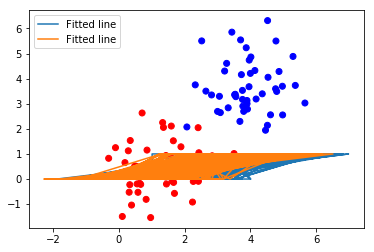

In [7]:
# 设置参数进行训练
maxEpochs = 50
minibatchSize = 25

# with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(maxEpochs):
        sumerr = 0
        for i in range(np.int32(len(y)/minibatchSize)):
            x_1 = x[i * minibatchSize: (i+1) * minibatchSize, :]
            y_1 = np.reshape(y[i * minibatchSize: (i + 1) * minibatchSize], [-1, 1])
            
            tf.reshape(y_1, [-1, 1])
            _, lossval, outputval, errval = sess.run([train, loss, output, err], feed_dict = {
                input_features: x_1,
                input_labels: y_1
            })
            sumerr = sumerr + errval
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(lossval), "err=", sumerr/np.int32(len(y)/minibatchSize))
    train_x, train_y = generate(100, mean, cov, [3.0], True)
    colors = ['r' if l == 0 else 'b' for l in train_y[:]]
    plt.scatter(train_x[:, 0], train_x[:, 1], c=colors)
    x_11 = np.linspace(-1, 8, 200)
    y_11 = - x_11 * (sess.run(w)[0]/sess.run(w)[1]) - sess.run(b)/sess.run(w)[1]
    plt.plot(x, y, label="Fitted line")
    plt.legend()
    plt.show()